# Linear Regression Techiniques
We use simple linear OLS regression using lagged price as features to demonstrate Random Walk Hypothesis and also set it as a bench mark for future ML models to be judged by. 

In [120]:
#Loading essential library for this project
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
import yfinance as yf
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [61]:
ticker = ['EURUSD=X']
start = '2010-01-01'
data = yf.download(ticker,start)

[*********************100%***********************]  1 of 1 completed


Caluculate log returns as they help normalizing the timeseries which is convinient for various statistical and ML model.  

In [62]:
data['returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2009-12-31,1.434206,1.443897,1.431045,1.432706,1.432706,0,NaN
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0,0.004379
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0,0.002363
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0,-0.004031
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,0,0.002647
...,...,...,...,...,...,...,...
2022-07-11,1.016611,1.016777,1.005429,1.016611,1.016611,0,-0.000366
2022-07-12,1.004753,1.007384,1.000110,1.004753,1.004753,0,-0.011734
2022-07-13,1.003311,1.011624,0.999890,1.003311,1.003311,0,-0.001436


In [65]:
data.dropna(inplace=True)

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0,0.004379
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0,0.002363
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0,-0.004031
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,0,0.002647
2010-01-07,1.440300,1.444481,1.430206,1.431803,1.431803,0,-0.005989
...,...,...,...,...,...,...,...
2022-07-11,1.016611,1.016777,1.005429,1.016611,1.016611,0,-0.000366
2022-07-12,1.004753,1.007384,1.000110,1.004753,1.004753,0,-0.011734
2022-07-13,1.003311,1.011624,0.999890,1.003311,1.003311,0,-0.001436


In [66]:
data['direction'] = np.sign(data['returns']).astype(int)

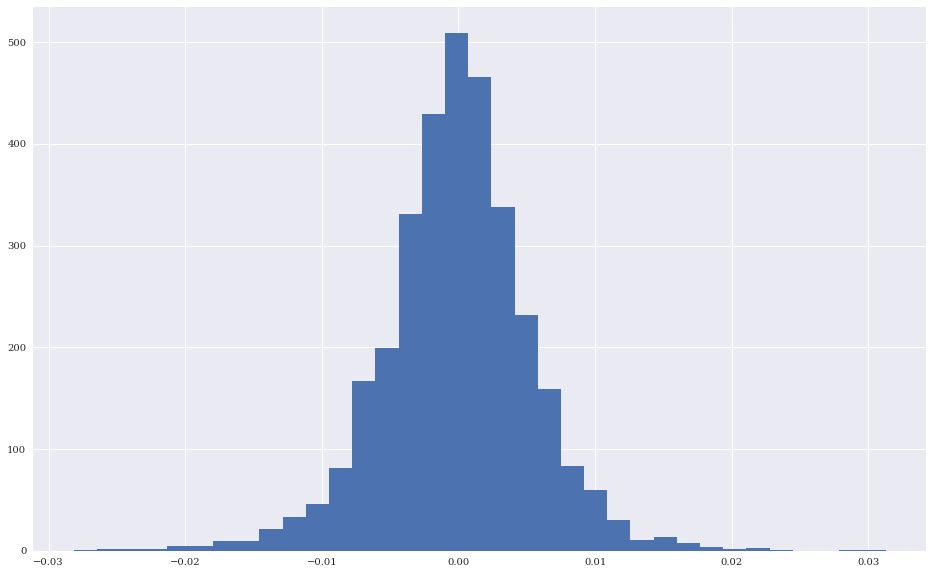

In [67]:
data['returns'].hist(bins=35, figsize=(16, 10)); # Check if the returns are normally distributued visually

Now we create fetures of lagged 1 and 2 day returns which will be used to predict our target label returns

In [68]:
lags = 2
def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [70]:
create_lags(data)
data

,Open,High,Low,Close,Adj Close,Volume,returns,direction,lag_1,lag_2
Date,,,,,,,,,,
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0,0.004379,1,NaN,NaN
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0,0.002363,1,0.004379,NaN
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0,-0.004031,-1,0.002363,0.004379
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,0,0.002647,1,-0.004031,0.002363
2010-01-07,1.440300,1.444481,1.430206,1.431803,1.431803,0,-0.005989,-1,0.002647,-0.004031
...,...,...,...,...,...,...,...,...,...,...
2022-07-11,1.016611,1.016777,1.005429,1.016611,1.016611,0,-0.000366,-1,-0.001628,-0.006971
2022-07-12,1.004753,1.007384,1.000110,1.004753,1.004753,0,-0.011734,-1,-0.000366,-0.001628
2022-07-13,1.003311,1.011624,0.999890,1.003311,1.003311,0,-0.001436,-1,-0.011734,-0.000366


In [72]:
data.dropna(inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,returns,direction,lag_1,lag_2
Date,,,,,,,,,,
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0,-0.004031,-1,0.002363,0.004379
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,0,0.002647,1,-0.004031,0.002363
2010-01-07,1.440300,1.444481,1.430206,1.431803,1.431803,0,-0.005989,-1,0.002647,-0.004031
2010-01-08,1.432090,1.443606,1.427104,1.441109,1.441109,0,0.006478,1,-0.005989,0.002647
2010-01-11,1.446487,1.455435,1.446487,1.451126,1.451126,0,0.006927,1,0.006478,-0.005989
...,...,...,...,...,...,...,...,...,...,...
2022-07-11,1.016611,1.016777,1.005429,1.016611,1.016611,0,-0.000366,-1,-0.001628,-0.006971
2022-07-12,1.004753,1.007384,1.000110,1.004753,1.004753,0,-0.011734,-1,-0.000366,-0.001628
2022-07-13,1.003311,1.011624,0.999890,1.003311,1.003311,0,-0.001436,-1,-0.011734,-0.000366


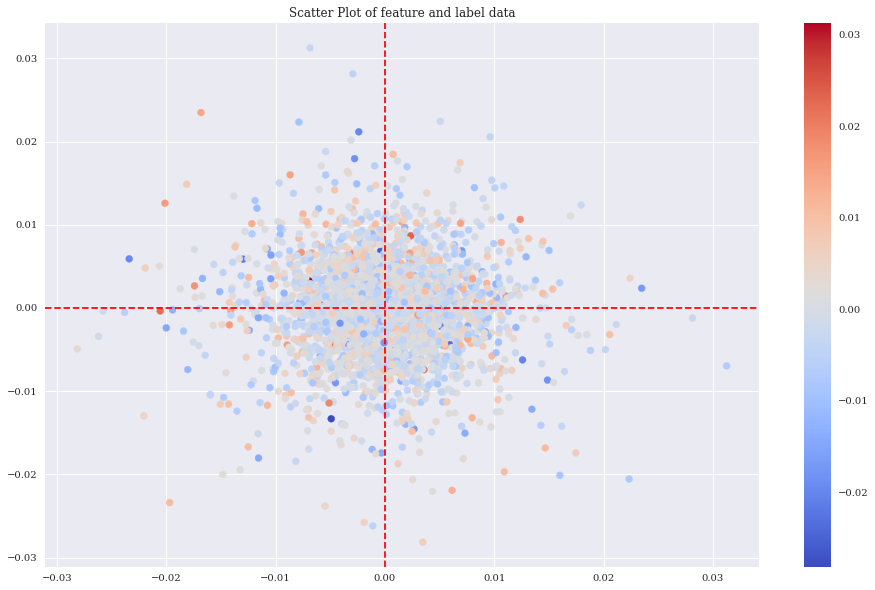

In [133]:
plt.figure(figsize=(16,10))
plt.scatter(x=data['lag_1'], y=data['lag_2'], c=data['returns'],cmap='coolwarm')
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--')
plt.title('Scatter Plot of feature and label data')
plt.colorbar();


The graph above shows the feature data distribution. Now we move ahead to define a linear regression model and fit inorder to generate prediction.

In [80]:
model = LinearRegression()

In [81]:
data['pos_ols_1'] = model.fit(data[cols],data['returns']).predict(data[cols])
data['pos_ols_2'] = model.fit(data[cols],data['direction']).predict(data[cols])

In [83]:
data[['pos_ols_1', 'pos_ols_2']] = np.where(data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)  # Tranform prediction to directional signals

In [84]:
data['pos_ols_1'].value_counts()

-1    2523
 1     741
Name: pos_ols_1, dtype: int64

In [85]:
data['pos_ols_2'].value_counts()

-1    1974
 1    1290
Name: pos_ols_2, dtype: int64

In [86]:
(data['pos_ols_1'].diff() != 0).sum()

1291

In [87]:
(data['pos_ols_2'].diff() != 0).sum()

1261

The two approaches yield different directional predictions in general.However, both lead to a relatively large number of trades over time. Lets compare the results of our strategy.

In [88]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']

In [89]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        0.696914
strat_ols_1    1.379081
strat_ols_2    1.610654
dtype: float64

In [90]:
(data['direction'] == data['pos_ols_1']).value_counts()

False    1652
True     1612
dtype: int64

In [91]:
(data['direction'] == data['pos_ols_2']).value_counts()

True     1679
False    1585
dtype: int64

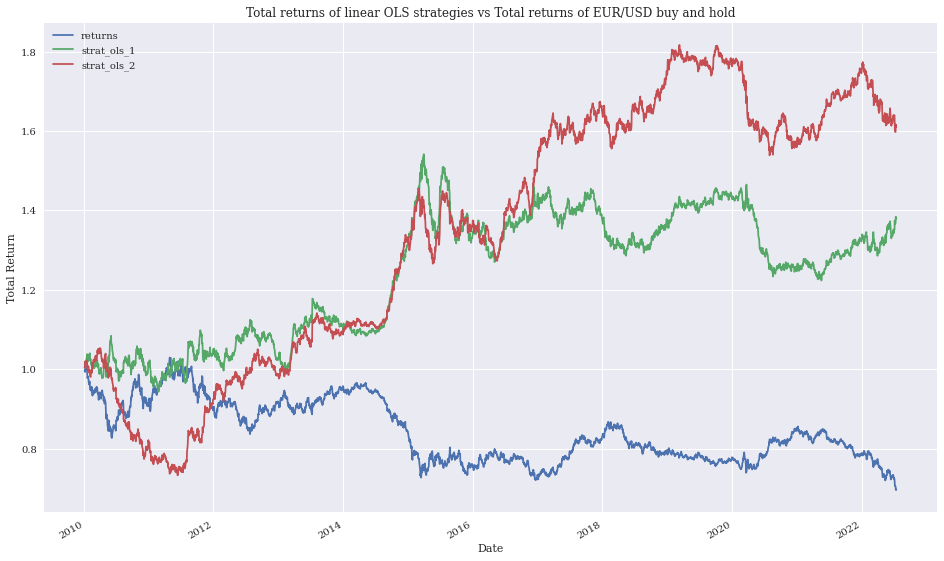

In [135]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(16, 10))
plt.ylabel('Total Return')
plt.title('Total returns of linear OLS strategies vs Total returns of EUR/USD buy and hold');

# K Mean Clustersing approach

The idea in simple terms is that the algorithm identifies two clusters of feature values that predict either an upward movement or a downward movement. We use the same features of return lags to keep oue comparision simple.

In [95]:
model = KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=2, random_state=0)

In [96]:
model.fit(data[cols]) 

KMeans(n_clusters=2, random_state=0)

In [97]:
data['pos_clus'] = model.predict(data[cols])

In [98]:
data['pos_clus'] = np.where(data['pos_clus'] == 1, -1, 1) #transforms clusters to trade signal

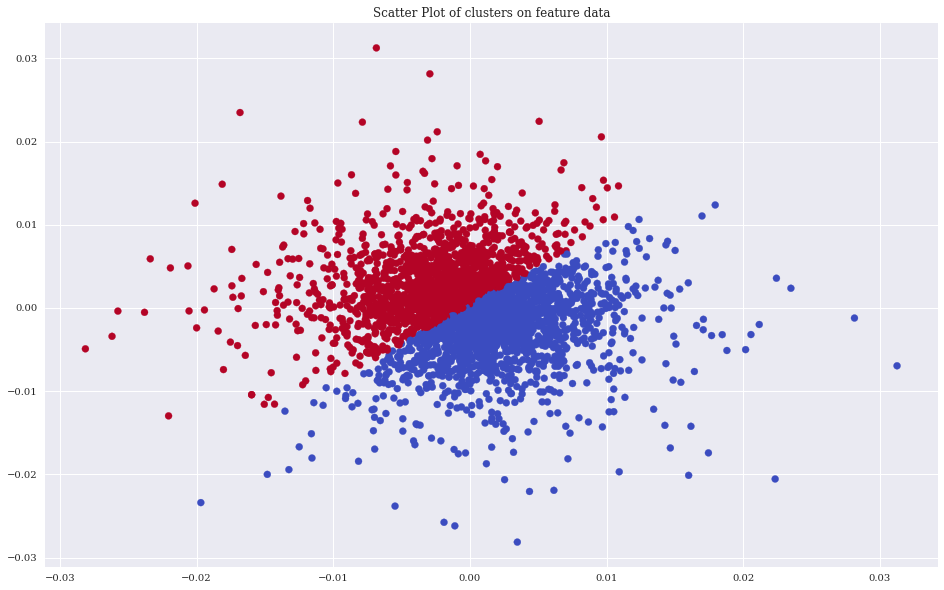

In [136]:
plt.figure(figsize=(16, 10))
plt.scatter(data[cols].iloc[:, 0], data[cols].iloc[:, 1],
c=data['pos_clus'], cmap='coolwarm')
plt.title('Scatter Plot of clusters on feature data');

In [100]:
data['strat_clus'] = data['pos_clus'] * data['returns']
data[['returns', 'strat_clus']].sum().apply(np.exp)

returns       0.696914
strat_clus    1.231900
dtype: float64

In [101]:
(data['direction'] == data['pos_clus']).value_counts()

False    1634
True     1630
dtype: int64

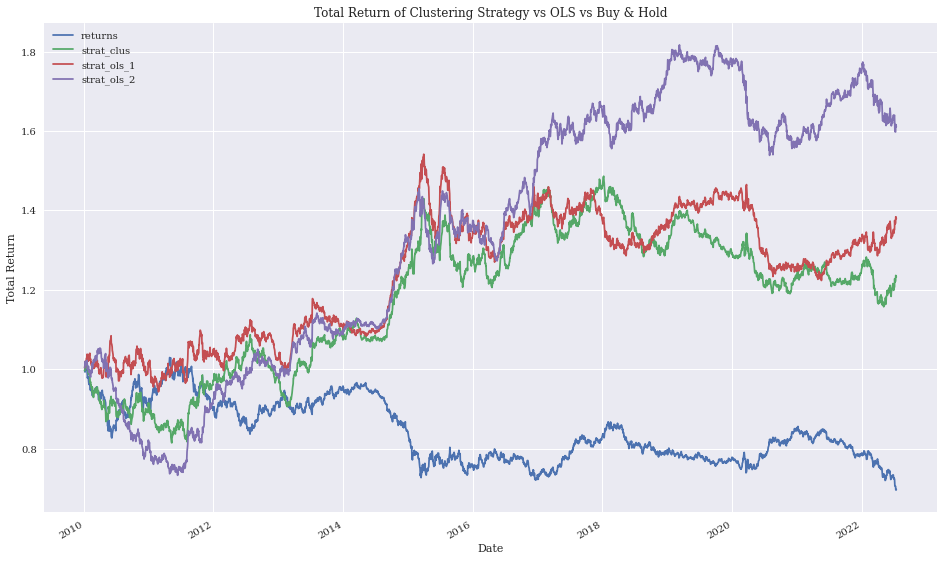

In [137]:
data[['returns', 'strat_clus','strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(16, 10))
plt.ylabel('Total Return')
plt.title('Total Return of Clustering Strategy vs OLS vs Buy & Hold');

Clustering strategy outperforms the benchmark but the OLS strategy is still superior for the currency.

# Frequency Approach:

Using frequency approach to predict directional movements in financial markets. To this end, one might transform the two real-valued features to binary ones and assess the probability of an upward and a downward movement, respectively, from the historical observations of such movements, given the four possible combinations for the two binary features ((0, 0), (0, 1), (1, 0), (1, 1)).

In [104]:
def create_bins(data, bins=[0]):  # creating bins of Feature data 
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)

In [107]:
create_bins(data)
data[cols_bin + ['direction']].head()

,lag_1_bin,lag_2_bin,direction
Date,,,
2010-01-05,1,1,-1
2010-01-06,0,1,1
2010-01-07,1,0,-1
2010-01-08,0,1,1
2010-01-11,1,0,1


In [108]:
grouped = data.groupby(cols_bin + ['direction'])
grouped.size()

lag_1_bin  lag_2_bin  direction
0          0          -1           373
                       0             7
                       1           409
           1          -1           416
                       0             3
                       1           423
1          0          -1           439
                       0             5
                       1           397
           1          -1           403
                       0             4
                       1           385
dtype: int64

In [110]:
res = grouped['direction'].size().unstack(fill_value=0)
res

direction             -1   0    1
lag_1_bin lag_2_bin              
0         0          373   7  409
          1          416   3  423
1         0          439   5  397
          1          403   4  385

In [111]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [112]:
res.style.apply(highlight_max, axis=1)
res

direction             -1   0    1
lag_1_bin lag_2_bin              
0         0          373   7  409
          1          416   3  423
1         0          439   5  397
          1          403   4  385

In [113]:
data['pos_freq'] = np.where(data[cols_bin].sum(axis=1) == 2, -1, 1)  #Translating frequency results to trading signals

In [114]:
(data['direction'] == data['pos_freq']).value_counts()

True     1632
False    1632
dtype: int64

In [115]:
data['strat_freq'] = data['pos_freq'] * data['returns']

In [116]:
data[['returns', 'strat_freq']].sum().apply(np.exp)

returns       0.696914
strat_freq    0.874566
dtype: float64

Text(0.5, 1.0, 'Total Return of All Strategy used')

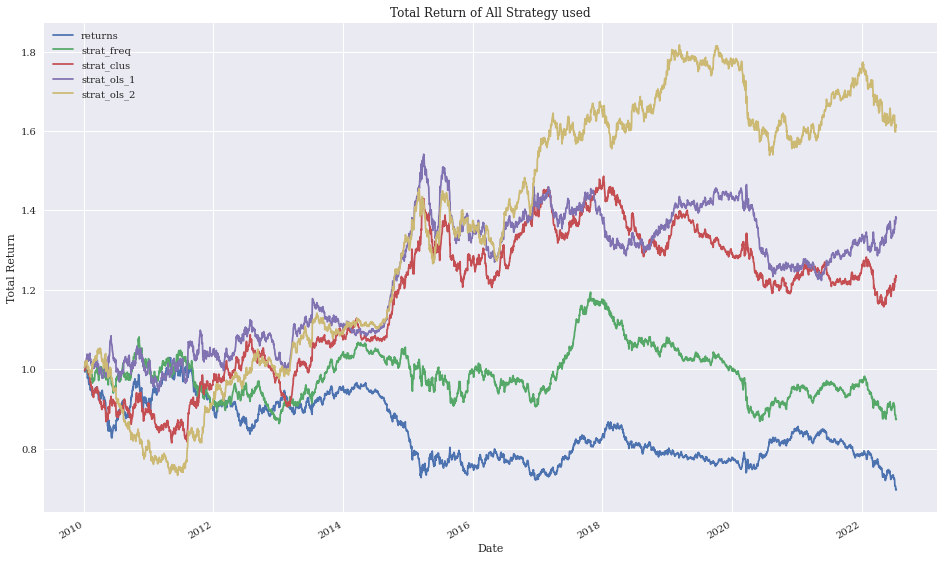

In [138]:
data[['returns', 'strat_freq','strat_clus','strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(16, 10))
plt.ylabel('Total Return')
plt.title('Total Return of All Strategy used')

# Classification Approach:

In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. In our trading world we can break down this approach in directional classification of up or down price movement. 

In [121]:
C = 1
models = {
'log_reg': linear_model.LogisticRegression(C=C),
'gauss_nb': GaussianNB(),
'svm': SVC(C=C)
}

In [122]:
def fit_models(data):
    mfit = {model: models[model].fit(data[cols_bin],data['direction'])for model in models.keys()}

In [123]:
fit_models(data)

In [124]:
def derive_positions(data):
    for model in models.keys():
        data['pos_' + model] = models[model].predict(data[cols_bin])

In [125]:
derive_positions(data)

In [127]:
def evaluate_strats(data):
    global sel
    sel = []
    for model in models.keys():
        col = 'strat_' + model
        data[col] = data['pos_' + model] * data['returns']
        sel.append(col)
        sel.insert(0, 'returns')

In [128]:
evaluate_strats(data)

In [129]:
sel.insert(1, 'strat_freq')

In [130]:
data[sel].sum().apply(np.exp)

returns           0.696914
strat_freq        0.874566
returns           0.696914
returns           0.696914
strat_log_reg     1.555814
strat_gauss_nb    1.555814
strat_svm         1.555814
dtype: float64

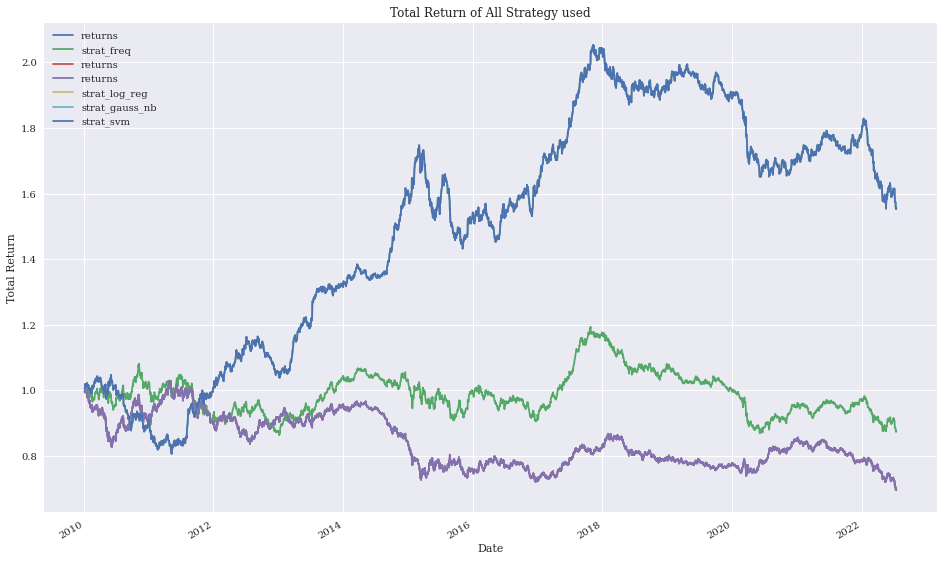

In [139]:
data[sel].cumsum().apply(np.exp).plot(figsize=(16, 10))
plt.ylabel('Total Return')
plt.title('Total Return of All Strategy used');

We can see that SVM strategy is considerably superior to even ols strategy